### Titanic disaster modelling 

In [1064]:
# importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
main_df=pd.read_csv(r"C:\Users\abhisv.CORP\3D Objects\retaildataset\titanic\train.csv")

In [1065]:
main_df.shape

(891, 12)

In [1066]:
main_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1067]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [1068]:
main_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1069]:
#To analyse whether the passenger is survived or not, lets take the columns that are useful, as here we can observe in titanic ship what are the factors that effect for a person to survive or not.

In [1070]:
# Lets take Pclass,Sex,Age,SibSp,parch,Fare,Embarked to predict survived or not.

In [1071]:
df=main_df[['Pclass','Sex','Age','SibSp','Parch','Survived','Fare','Embarked']]

In [1072]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Survived,Fare,Embarked
0,3,male,22.0,1,0,0,7.2500,S
1,1,female,38.0,1,0,1,71.2833,C
2,3,female,26.0,0,0,1,7.9250,S
3,1,female,35.0,1,0,1,53.1000,S
4,3,male,35.0,0,0,0,8.0500,S


In [1073]:
#Lets do some analysis

In [1074]:
#sns.countplot(x=df['Pclass'],data=df) # Pclass3 as more number of passengers fallowed by Pclass 1 and 2.

In [1075]:
#sns.countplot(x=df['Sex'],hue=df['Survived'])

In [1076]:
#sns.countplot(x=df['Pclass'],hue=df['Survived'])

In [1077]:
#sns.countplot(x=df['Sex'],hue=df['Survived']) #Females has survived more

In [1078]:
#g=sns.FacetGrid(df,col='Survived')
#g.map(plt.hist,'Age',bins=20)# Adults have survived more compared to elder people

In [1079]:
#g1=sns.FacetGrid(df,row='Pclass',col='Survived')
#g1.map(plt.hist,'Age') # there are more survived people in Pclass 1 with Age between 0-35 years

In [1080]:
# Checking null values.
df.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Survived      0
Fare          0
Embarked      2
dtype: int64

In [1081]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1082]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [1083]:
df['Embarked']=df['Embarked'].fillna('S')

In [1084]:
df.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Survived      0
Fare          0
Embarked      0
dtype: int64

In [1085]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [1086]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [1087]:
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

In [1088]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [1089]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

In [1090]:
df.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Survived    0
Fare        0
Embarked    0
dtype: int64

In [1091]:
df['age']=pd.cut(df.iloc[:,2],5,labels=['0','1','2','3','4'])

In [1092]:
df['fare']=pd.qcut(df.Fare,4,labels=['0','1','2','3'],duplicates='raise')

In [1093]:
df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Survived,Fare,Embarked,age,fare
0,3,0,22.0,1,0,0,7.2500,0,1,0
1,1,1,38.0,1,0,1,71.2833,1,2,3


In [1094]:
df.drop(['Fare','Age'],axis=1,inplace=True)

In [1095]:
cor=df.corr()

In [1096]:
cor_target = abs(cor["Survived"])

In [1097]:
cor_target# As observed now Sibsp and parch can be converted into one feature, but the problem is with embarked, so lets not do get dummies.(Dummies donepreviously so am removing that step)

Pclass      0.338481
Sex         0.543351
SibSp       0.035322
Parch       0.081629
Survived    1.000000
Embarked    0.106811
Name: Survived, dtype: float64

In [1098]:
df['Familysize']=df['SibSp']+df['Parch']+1

In [1099]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [1100]:
df.columns

Index(['Pclass', 'Sex', 'Survived', 'Embarked', 'age', 'fare', 'Familysize'], dtype='object')

In [1101]:
df['IsAlone'] = 0
df.loc[df['Familysize'] == 1, 'IsAlone'] = 1

In [1102]:
df.drop('Familysize',axis=1,inplace=True)

In [1103]:
df.columns

Index(['Pclass', 'Sex', 'Survived', 'Embarked', 'age', 'fare', 'IsAlone'], dtype='object')

In [1104]:
X=df[['Pclass', 'Sex','Embarked', 'age', 'fare', 'IsAlone']]
Y=df['Survived']

In [1105]:
# since none of the features fallowing normal distribution, lets use non linear algorithms, such as DTC,RFC,Bagging

In [1106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [1107]:
classifier = LogisticRegression()
classifier.fit(X, Y)
Y_pred=classifier.predict(X)

In [1108]:
acc_Logistic = cross_val_score(classifier, X, Y, cv=10, scoring='accuracy').mean()
acc_Logistic

0.7878969469980706

In [1109]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X, Y)
y_pred = classifier.predict(X)

In [1110]:
acc_KNN = cross_val_score(classifier, X, Y, cv=10, scoring='accuracy').mean()
acc_KNN

0.8014813869027352

In [1111]:
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

NameError: name 'X_train' is not defined

In [ ]:
acc_SVC = cross_val_score(classifier, X, Y, cv=10, scoring='accuracy').mean()
acc_SVC

In [1112]:
classifier_dtc = DecisionTreeClassifier()
classifier_dtc.fit(X, Y)
y_pred = classifier_dtc.predict(X)

In [1113]:
acc_DTC = cross_val_score(classifier_dtc, X, Y, cv=10, scoring='accuracy').mean()
acc_DTC

0.814915162864601

In [1114]:
classifier = RandomForestClassifier()
classifier.fit(X, Y)
y_pred = classifier.predict(X)

In [1115]:
acc_RFC = cross_val_score(classifier, X, Y, cv=10, scoring='accuracy').mean()
acc_RFC

0.8093349222562706

In [1116]:
# predict probabilities
#prob=rfc.predict_proba(X)

In [1117]:
#prob=pd.DataFrame(prob)

In [1118]:
#prob.head(3)

In [1119]:
#from sklearn.metrics import roc_auc_score
#rocaucscore=roc_auc_score(Y,Y_pred)
#print(rocaucscore)

In [1120]:
#We can then use the roc_auc_score() function to calculate the true-positive rate and false-positive rate for the predictions using a set of thresholds that can then be used to create a ROC Curve plot.
#rfc_probs=roc_auc_score(Y,prob)

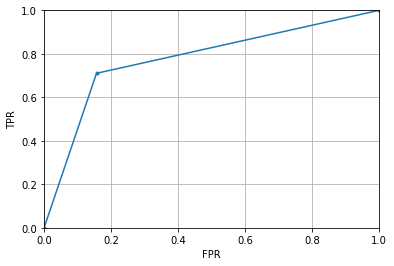

In [1121]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(Y,Y_pred)
plt.plot(fpr,tpr,marker='.', label='rfc')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid(True)

In [1122]:
gmeans = np.sqrt(tpr * (1-fpr))
gmeans

array([0.        , 0.77409526, 0.        ])

In [1123]:
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=1.000000, G-Mean=0.774


In [1124]:
thresholds

array([2, 1, 0], dtype=int64)

In [1125]:
fpr

array([0.        , 0.15664845, 1.        ])

In [1126]:
tpr

array([0.        , 0.71052632, 1.        ])

## Testing on test Dataset 

In [1154]:
df_test=pd.read_csv(r"C:\Users\abhisv.CORP\3D Objects\test.csv")

In [1155]:
df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [1156]:
df_test=df_test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [1157]:
df_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [1158]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [1159]:
df_test['Fare'].fillna(df_test['Fare'].median(),inplace=True)

In [1160]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [1161]:
df_test['Age']=df_test[['Age','Pclass']].apply(impute_age,axis=1)

In [1162]:
df_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S


In [1163]:
df_test['age']=pd.cut(df_test.iloc[:,2],5,labels=['0','1','2','3','4'])

In [1164]:
df_test['fare']=pd.qcut(df_test.Fare,4,labels=['0','1','2','3'],duplicates='raise')

In [1165]:
df_test.drop(['Fare','Age'],axis=1,inplace=True)

In [1166]:
df_test['Familysize']=df_test['SibSp']+df_test['Parch']+1

In [1167]:
df_test.drop(['SibSp','Parch'],axis=1,inplace=True)

In [1168]:
df_test['IsAlone'] = 0
df_test.loc[df_test['Familysize'] == 1, 'IsAlone'] = 1

In [1169]:
df_test.drop('Familysize',axis=1,inplace=True)

In [1170]:
df_test['Sex']=df_test['Sex'].map({'male':0,'female':1})

In [1171]:
df_test['Embarked']=df_test['Embarked'].map({'S':0,'C':1,'Q':2})

In [1172]:
y_test_pred = classifier_dtc.predict(df_test)

In [1173]:
y_test_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [1180]:
y_test_pred=pd.DataFrame(y_test_pred)

In [1184]:
y_test_pred.rename(columns={0:'Survived'},inplace=True)

In [1187]:
y_test_pred.to_csv('gender_submission2.csv', index=False)

In [1188]:
pwd

'C:\\Users\\abhisv.CORP'